# **1.Introducción:**


En el presente notebook, llevaremos a cabo el Analisis Exploratorio, la Transformación de los Datos y un posterior analisis al DataSet entregado como "AnexoA" que contiene datos correspondientes a las votaciones realizadas por el Senado de Chile, estos datos estan extraidos desde la biblioteca del congreso nacional de Chile.





## - La **Población** presente en este estudio, vendrian a ser Los Parlamentarios junto a los dias en que realizan las sesiones para votar por los proyectos o temas especificos

## - La **Muestra** presente en el estudio vendria a ser una porción o un subconjunto de la población, para este estudio consideraremos 30 días en los que se realizo sesión

----------------------------------------------------------------------------------------------------------

## En primer lugar importamos la libreria pickle para poder acceder y leer este archivo ".pkl" y asi analizarlo

In [ ]:
import pickle
with open('AnexoA.pkl','rb') as f:
  df = pickle.load(f)

In [ ]:
df

0    \
data     Latorre R., Juan Ignacio                                                        Si   
         Coloma C., Juan Antonio                                                         Si   
         García R., José                                                                 Si   
         Bianchi C., Carlos                                                              Si   
         Navarro B., Alejandro                                                           Si   
         Allende B., Isabel                                                              Si   
         Lagos W., Ricardo                                                               Si   
         García Huidobro S., Alejandro                                                   Si   
         Guillier Á., Alejandro                                                       Pareo   
         Durana S., José Miguel                                                          Si   
         Prohens E., Rafael                                                              Si   
         Pugh O., Kenneth                                                                Si   
         Elizalde S., Alvaro                                                             Si   
         Galilea V., Rodrigo                                                             Si   
         Huenchumilla J., Francisco                                                      Si   
         Sandoval P., David                                                              Si   
         Pizarro S., Jorge                                                              NaN   
         Girardi L., Guido                                                              NaN   
         Letelier M., Juan Pablo                                                        NaN   
         Pérez V., Víctor                                                               NaN   
         Chahuán C., Francisco                                                          NaN   
         Quintana L., Jaime                                                             NaN   
         Rincón G., Ximena                                                              NaN   
         Von Baer J., Ena                                                               NaN   
         Araya G., Pedro                                                                NaN   
         Van Rysselberghe H., Jacqueline                                                NaN   
         Goic B., Carolina                                                              NaN   
         Harboe B., Felipe                                                              NaN   
         De Urresti L., Alfonso                                                         NaN   
         Quinteros L., Rabindranath                                                     NaN   
         Moreira B., Iván                                                               NaN   
         Muñoz D., Adriana                                                              NaN   
         Ossandón I., Manuel José                                                       NaN   
         Insulza S., José Miguel                                                        NaN   
         Ebensperger O., Luz Eliana                                                     NaN   
         Soria Q., Jorge                                                                NaN   
         Provoste C., Yasna                                                             NaN   
         Castro P., Juan                                                                NaN   
         Aravena A., Carmen Gloria                                                      NaN   
         Kast S., Felipe                                                                NaN   
         Órdenes N., Ximena                                                             NaN   
         Allamand Z., Andrés                                                            NaN   
   

## Importamos librerias necesarias para poder llevar a cabo el estudio

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



from pandas import Series,DataFrame
import numpy as np


In [ ]:
#Datos de "Metadata" que corresponden a los datos de las 30 sesiones 
dfMetadata = df.iloc[45:55,:30]
pd.DataFrame.transpose(df)
dfMetadata = pd.DataFrame.transpose(dfMetadata)
dfMetadata


metadata                                                                \
   ABSTENCION                                              ETAPA      FECHA   
0           0                      Primer trámite constitucional 2018-12-12   
1           0                      Primer trámite constitucional 2020-06-02   
2           1                      Primer trámite constitucional 2019-12-30   
3           0                      Primer trámite constitucional 2019-03-05   
4           0                      Primer trámite constitucional 2020-01-29   
5           0                      Tercer trámite constitucional 2020-07-29   
6           0                     Segundo trámite constitucional 2020-08-19   
7           0                     Segundo trámite constitucional 2020-11-03   
8           0                      Primer trámite constitucional 2019-03-19   
9           0                      Primer trámite constitucional 2019-04-17   
10          2                     Segundo trámite constitucional 2018-09-12   
11          0                     Segundo trámite constitucional 2018-04-10   
12          0                     Segundo trámite constitucional 2018-10-24   
13          0                     Segundo trámite constitucional 2019-04-10   
14          0                      Primer trámite constitucional 2019-04-03   
15          0                      Tercer trámite constitucional 2019-06-12   
16          2                      Tercer trámite constitucional 2019-06-12   
17          3  Disc. informe C.Mixta por rechazo de modific. ... 2019-06-19   
18          9                     Segundo trámite constitucional 2019-01-23   
19          1                      Primer trámite constitucional 2020-11-17   
20          0                      Primer trámite constitucional 2019-06-05   
21          1                      Primer trámite constitucional 2019-01-09   
22          0                      Primer trámite constitucional 2019-10-15   
23          5                     Segundo trámite constitucional 2020-08-11   
24          7                      Primer trámite constitucional 2020-03-26   
25         11                     Segundo trámite constitucional 2020-09-08   
26          0                     Segundo trámite constitucional 2018-12-12   
27          2                     Segundo trámite constitucional 2018-10-09   
28          1                     Segundo trámite constitucional 2018-12-19   
29          0                     Segundo trámite constitucional 2020-01-06   

                                                 \
    NO PAREO                QUORUM   SESION  SI   
0    0     1        Mayoría simple   77/366  15   
1    1     0                  None   31/368  37   
2    0     1  Cuatro séptimos Q.C.   89/367  27   
3    0     0        Mayoría simple   94/366  39   
4    0     0  Cuatro séptimos Q.C.  103/367  35   
5    0     0  Cuatro séptimos Q.C.   57/368  36   
6    0     0        Mayoría simple   70/368  39   
7    0     0  Cuatro séptimos Q.C.  108/368  35   
8    0     1        Mayoría simple    3/367  35   
9    0     3        Mayoría simple   11/367  24   
10   0     1        Mayoría simple   52/366  21   
11   0     0        Mayoría simple    8/366  34   
12   0     1        Mayoría simple   63/366  25   
13   1     0        Mayoría simple    9/367  25   
14   0     1        Mayoría simple    7/367  26   
15   0     0        Mayoría simple   25/367  24   
16  22     0        Mayoría simple   25/367   0   
17   0     0        Mayoría simple   28/367  30   
18   1     0        Mayoría simple   91/366  19   
19   0     1        Mayoría simple  112/368  34   
20   0     0        Mayoría simple   23/367  32   
21   0     0  Cuatro séptimos Q.C.   87/366  37   
22   0     0  Cuatro séptimos Q.C.   55/367  37   
23   2     0        Mayoría simple   65/368  23   
24   0     0                  Q.C.    7/368  23   
25   0     0        Mayoría simple   84/368  24   
26   0     1        Mayoría simple   77/366  36 

# En este punto separo los datos "data" de la "Metadata" para una correcta interpretación de ambos Dataframes

#**2. Variables presentes en el estudio**

### **Data:**


*   Nombres: Nombre de los legisladores (Cualitativa Nominal)
*   Id: id asignada a cada legislador (Cualitativa Ordinal)


### **MetaData:**


*   Abstención: Cantidad de abstenciones por sesion (Cuantitativa Discreta)
*   Etapa: Define en que etapa del proceso legislativo se encuentra (Cualitativa Nominal)
*   Fecha: Fecha de la sesión (Cualitativa Ordinal)
*   No: Cantidad de votos "No" de la sesión (Cuantitativa Discreta)
*   Pareo: Cantidad de personas que hicieron pareo (Cuantitativa Discreta)
*   Quorum: Criterio utilizado para alcanzar quorum (Cualitativa Nominal)
*   Sesion: Identificador de la sesión (Cualitativa Ordinal)
*   Si: Cantidad de votos "Si" de la sesión (Cuantitativa Discreta)
*   Tema: Tema del cual se hablara en la sesion (Cualitativa Ordinal)
*   TipoVotacion: Corresponde al tipo de votacion que se utilizo en la sesion (Cualitativa Nominal)








In [ ]:
#Datos de "Data" que corresponden a los votos de los parlamentarios en las sesiones
dfData = df.iloc[:45,:30]
dfData = pd.DataFrame.transpose(dfData)
dfData

data                                          \
   Latorre R., Juan Ignacio Coloma C., Juan Antonio García R., José   
0                        Si                      Si              Si   
1                        No                     NaN              Si   
2                        Si                      Si              Si   
3                        Si                      Si              Si   
4                        Si                      Si              Si   
5                        Si                      Si              Si   
6                        Si                      Si              Si   
7                        Si                     NaN              Si   
8                        Si                      Si             NaN   
9                        Si                      Si              Si   
10                       Si                      Si              Si   
11                       Si                      Si              Si   
12                       Si                      Si              Si   
13                       No                      Si              Si   
14                       Si                     NaN             NaN   
15                       Si                     NaN              Si   
16                       No                     NaN      Abstencion   
17                       Si                      Si              Si   
18                       Si                     NaN             NaN   
19                       Si                      Si              Si   
20                       Si                     NaN              Si   
21                       Si                      Si              Si   
22                       Si                      Si              Si   
23               Abstencion                      Si              Si   
24                       Si              Abstencion             NaN   
25                       Si              Abstencion              Si   
26                       Si                      Si              Si   
27                       Si                     NaN             NaN   
28                       Si                      Si             NaN   
29                       Si                      Si              Si   

                                                                \
   Bianchi C., Carlos Navarro B., Alejandro Allende B., Isabel   
0                  Si                    Si                 Si   
1                  Si                    Si                 Si   
2                  Si                   NaN                 Si   
3                  Si                    Si                NaN   
4                  Si                    Si                 Si   
5                  Si                    Si                 Si   
6                  Si                    Si                 Si   
7                  Si                   NaN                 Si   
8                  Si                    Si                NaN   
9                 NaN                   NaN                 Si   
10                 Si                   NaN                NaN   
11                 Si                    Si                 Si   
12                NaN                   NaN                 Si   
13                NaN                   NaN                 Si   
14                 Si                    Si                NaN   
15                 Si                   NaN                 Si   
16                NaN                   NaN                 No   
17                 Si                   NaN                NaN   
18                 Si                   NaN                 Si   
19                 Si                   NaN                 Si   
20                 Si                   NaN                NaN   
21                 Si                   NaN                 Si   
22                 Si                   NaN                 Si   
23                NaN                    No                 Si   
24                 Si             



---

# **3. Estudio de los datos**

Como grupo en primera instancia seleccionamos las variables **'SI'**; para calcular el promedio de veces que los senadores votaron que Si en las sesiones en estudio y **'SESION'**; para calcular un promedio de cuanta asistencia hubo en las 30 sesiones seleccionadas e identificar en que sesiones fue que hubo mayor y menor asistencia.

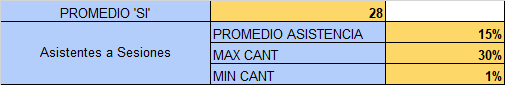

### Con respecto a la variable 'SI'


*   Se obtuvo que de la muestra de estudio, es decir, las 30 sesiones, existió **un promedio de 28 veces** en que los senadores votaron que 'Si' en una sesion especifica.

### Con respecto a la variable 'SESION'


*   Se obtuvo que con respecto a la muestra en estudio, existió un **promedio del 15%** de asistencia. Además la **asistencia mas alta registrada en la muestra es del 30%**, junto a **la menor que fue del 1%**.







---



Además seleccionamos la variable **'QUORUM'** para evidenciar como fue **la distribución de los quorums** en la muestra estudiada

In [ ]:
dfMetadata['metadata','QUORUM']

0           Mayoría simple
1                     None
2     Cuatro séptimos Q.C.
3           Mayoría simple
4     Cuatro séptimos Q.C.
5     Cuatro séptimos Q.C.
6           Mayoría simple
7     Cuatro séptimos Q.C.
8           Mayoría simple
9           Mayoría simple
10          Mayoría simple
11          Mayoría simple
12          Mayoría simple
13          Mayoría simple
14          Mayoría simple
15          Mayoría simple
16          Mayoría simple
17          Mayoría simple
18          Mayoría simple
19          Mayoría simple
20          Mayoría simple
21    Cuatro séptimos Q.C.
22    Cuatro séptimos Q.C.
23          Mayoría simple
24                    Q.C.
25          Mayoría simple
26          Mayoría simple
27                    Q.C.
28                    Q.C.
29          Mayoría simple
Name: (metadata, QUORUM), dtype: object

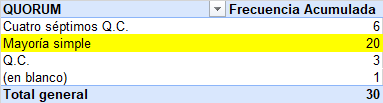
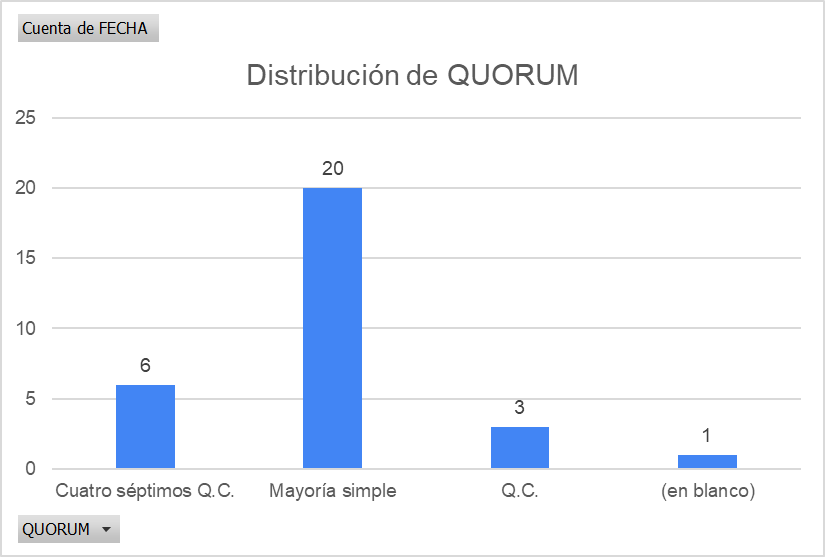

A partir del grafico podemos concluir que la **moda con respecto a la variable QUORUM es 'Mayoria simple'**.





---




Lo siguiente que vamos a hacer es ver la distribución que tiene la **variable 'Tipo de votacion'**, para eso haremos un histograma.


In [ ]:
dfMetadata['metadata','TIPOVOTACION']

0                       Discusión general
1                       Discusión general
2                       Discusión general
3                       Discusión general
4                    Discusión particular
5                         Discusión única
6                       Discusión general
7                       Discusión general
8                       Discusión general
9                       Discusión general
10                      Discusión general
11                      Discusión general
12                      Discusión general
13                      Discusión general
14                      Discusión general
15                        Discusión única
16                        Discusión única
17    Discusión informe de Comisión Mixta
18                      Discusión general
19                      Discusión general
20                      Discusión general
21                      Discusión general
22                   Discusión particular
23                      Discusión 

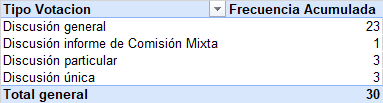

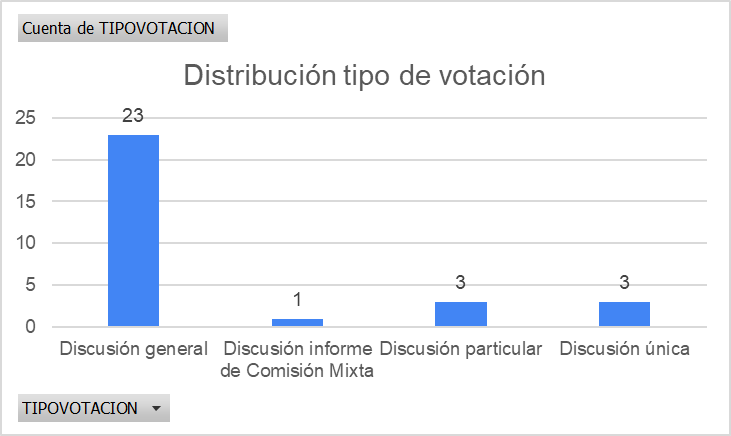

Con respecto a la distribución del tipo de votación podemos desprender que el **tipo de votación mas repetido o utilizado es el de 'Discución general'**. 



---



A continuacion, graficaremos la distribución de la **variable 'Etapa de la sesión'**.

In [ ]:
dfMetadata['metadata','ETAPA']

0                         Primer trámite constitucional
1                         Primer trámite constitucional
2                         Primer trámite constitucional
3                         Primer trámite constitucional
4                         Primer trámite constitucional
5                         Tercer trámite constitucional
6                        Segundo trámite constitucional
7                        Segundo trámite constitucional
8                         Primer trámite constitucional
9                         Primer trámite constitucional
10                       Segundo trámite constitucional
11                       Segundo trámite constitucional
12                       Segundo trámite constitucional
13                       Segundo trámite constitucional
14                        Primer trámite constitucional
15                        Tercer trámite constitucional
16                        Tercer trámite constitucional
17    Disc. informe C.Mixta por rechazo de modif

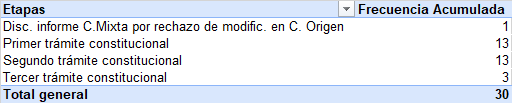

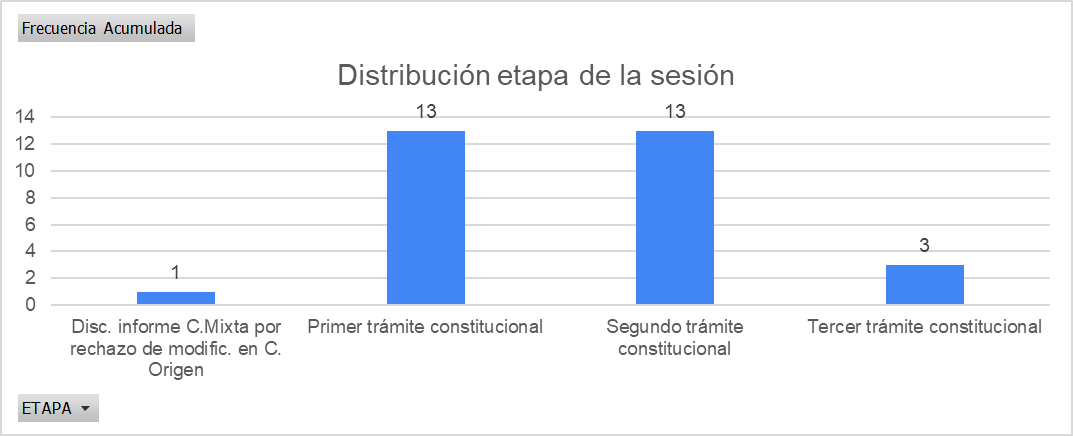

A partir de la grafica, podemos deducir que la **moda de la variable ETAPA, son  'Primer trámite constitucional' y 'Segundo tramite constitucional'**.



---



# **Parte 2 del Trabajo**

---

# **4. Tratando los datos nulos**



In [ ]:
dfData.dtypes

data  Latorre R., Juan Ignacio           object
      Coloma C., Juan Antonio            object
      García R., José                    object
      Bianchi C., Carlos                 object
      Navarro B., Alejandro              object
      Allende B., Isabel                 object
      Lagos W., Ricardo                  object
      García Huidobro S., Alejandro      object
      Guillier Á., Alejandro             object
      Durana S., José Miguel             object
      Prohens E., Rafael                 object
      Pugh O., Kenneth                   object
      Elizalde S., Alvaro                object
      Galilea V., Rodrigo                object
      Huenchumilla J., Francisco         object
      Sandoval P., David                 object
      Pizarro S., Jorge                  object
      Girardi L., Guido                  object
      Letelier M., Juan Pablo            object
      Pérez V., Víctor                   object
      Chahuán C., Francisco             

In [ ]:
dfMetadata.dtypes

metadata  ABSTENCION              object
          ETAPA                   object
          FECHA           datetime64[ns]
          NO                      object
          PAREO                   object
          QUORUM                  object
          SESION                  object
          SI                      object
          TEMA                    object
          TIPOVOTACION            object
dtype: object

En esta etapa, nos dedicaremos a buscar y controlar los valores nulos presentes en ambos dataframes


In [ ]:
dfData.isnull().values.any()

True

In [ ]:
dfMetadata.isnull().values.any()

True

Con el comando anterior pudimos ver que nos entrega por consola como respuesta "True", esto nos dice que efectivamente existen datos nulos en los dataframes. A continuacion con la propiedad ".isnull()" podemos ver en donde estan esos datos nulos especificamente en ambas matrices.

In [ ]:
dfData.isnull()

data                                          \
   Latorre R., Juan Ignacio Coloma C., Juan Antonio García R., José   
0                     False                   False           False   
1                     False                    True           False   
2                     False                   False           False   
3                     False                   False           False   
4                     False                   False           False   
5                     False                   False           False   
6                     False                   False           False   
7                     False                    True           False   
8                     False                   False            True   
9                     False                   False           False   
10                    False                   False           False   
11                    False                   False           False   
12                    False                   False           False   
13                    False                   False           False   
14                    False                    True            True   
15                    False                    True           False   
16                    False                    True           False   
17                    False                   False           False   
18                    False                    True            True   
19                    False                   False           False   
20                    False                    True           False   
21                    False                   False           False   
22                    False                   False           False   
23                    False                   False           False   
24                    False                   False            True   
25                    False                   False           False   
26                    False                   False           False   
27                    False                    True            True   
28                    False                   False            True   
29                    False                   False           False   

                                                                \
   Bianchi C., Carlos Navarro B., Alejandro Allende B., Isabel   
0               False                 False              False   
1               False                 False              False   
2               False                  True              False   
3               False                 False               True   
4               False                 False              False   
5               False                 False              False   
6               False                 False              False   
7               False                  True              False   
8               False                 False               True   
9                True                  True              False   
10              False                  True               True   
11              False                 False              False   
12               True                  True              False   
13               True                  True              False   
14              False                 False               True   
15              False                  True              False   
16               True                  True              False   
17              False                  True               True   
18              False                  True              False   
19              False                  True              False   
20              False                  True               True   
21              False                  True              False   
22              False                  True              False   
23               True                 False              False   
24              False             

In [ ]:
dfMetadata.isnull()

metadata                                                          \
   ABSTENCION  ETAPA  FECHA     NO  PAREO QUORUM SESION     SI   TEMA   
0       False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False   True  False  False  False   
2       False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False   
5       False  False  False  False  False  False  False  False  False   
6       False  False  False  False  False  False  False  False  False   
7       False  False  False  False  False  False  False  False  False   
8       False  False  False  False  False  False  False  False  False   
9       False  False  False  False  False  False  False  False  False   
10      False  False  False  False  False  False  False  False  False   
11      False  False  False  False  False  False  False  False  False   
12      False  False  False  False  False  False  False  False  False   
13      False  False  False  False  False  False  False  False  False   
14      False  False  False  False  False  False  False  False  False   
15      False  False  False  False  False  False  False  False  False   
16      False  False  False  False  False  False  False  False  False   
17      False  False  False  False  False  False  False  False  False   
18      False  False  False  False  False  False  False  False  False   
19      False  False  False  False  False  False  False  False  False   
20      False  False  False  False  False  False  False  False  False   
21      False  False  False  False  False  False  False  False  False   
22      False  False  False  False  False  False  False  False  False   
23      False  False  False  False  False  False  False  False  False   
24      False  False  False  False  False  False  False  False  False   
25      False  False  False  False  False  False  False  False  False   
26      False  False  False  False  False  False  False  False  False   
27      False  False  False  False  False  False  False  False  False   
28      False  False  False  False  False  False  False  False  False   
29      False  False  False  False  False  False  False  False  False   

                 
   TIPOVOTACION  
0         False  
1         False  
2         False  
3         False  
4         False  
5         False  
6         False  
7         False  
8         False  
9         False  
10        False  
11        False  
12        False  
13        False  
14        False  
15        False  
16        False  
17        False  
18        False  
19        False  
20        False  
21        False  
22        False  
23        False  
24        False  
25        False  
26        False  
27        False  
28        False  
29        False

In [ ]:
for tipo in dfData.columns:
  print(f'Total de valores nulos de', tipo, '=',{dfData[tipo].isna().sum()})

Total de valores nulos de ('data', 'Latorre R., Juan Ignacio') = {0}
Total de valores nulos de ('data', 'Coloma C., Juan Antonio') = {8}
Total de valores nulos de ('data', 'García R., José') = {6}
Total de valores nulos de ('data', 'Bianchi C., Carlos') = {6}
Total de valores nulos de ('data', 'Navarro B., Alejandro') = {14}
Total de valores nulos de ('data', 'Allende B., Isabel') = {7}
Total de valores nulos de ('data', 'Lagos W., Ricardo') = {12}
Total de valores nulos de ('data', 'García Huidobro S., Alejandro') = {5}
Total de valores nulos de ('data', 'Guillier Á., Alejandro') = {1}
Total de valores nulos de ('data', 'Durana S., José Miguel') = {2}
Total de valores nulos de ('data', 'Prohens E., Rafael') = {10}
Total de valores nulos de ('data', 'Pugh O., Kenneth') = {7}
Total de valores nulos de ('data', 'Elizalde S., Alvaro') = {1}
Total de valores nulos de ('data', 'Galilea V., Rodrigo') = {4}
Total de valores nulos de ('data', 'Huenchumilla J., Francisco') = {4}
Total de valore

A partir del bucle for utilizado, podemos recorrer el dataframe tipo Data y ver todas las columnas, es decir, los senadores en busqueda de datos nulos, con esto declaramos de una forma simple y clara en los lugares o los senadores que presentan la mayor cantidad de nulos.

Esto anterior, se ve de mejor manera en el "Diagrama de calor" planteado acontinuación, donde se pueden apreciar de forma grafíca estos resultados.

<function matplotlib.pyplot.show(close=None, block=None)>

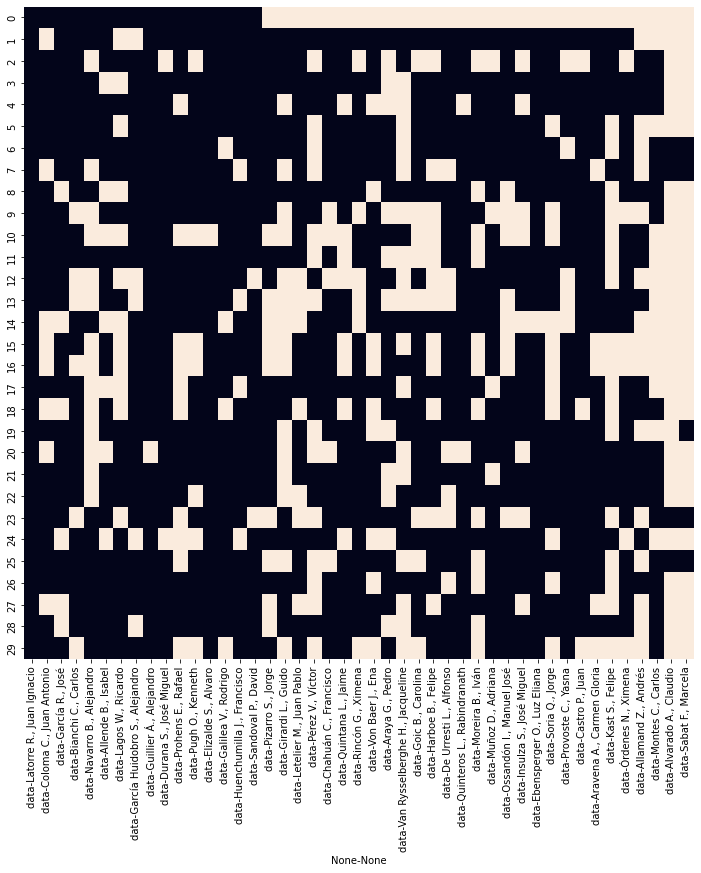

In [ ]:
plt.figure(figsize=(12,12))
SenaNulos =sns.heatmap(dfData.isnull(),cbar=False)
plt.show



Para corregir y cambiar los datos nulos presentes en el dataframe de los senadores reemplazaremos los nulos, por "Ausente", ya que nos pareció lo mas logico para simbolizar el porque el senador posee nulo esos campos.






In [ ]:
CleanData = dfData.fillna('Ausente')
CleanData

data                                          \
   Latorre R., Juan Ignacio Coloma C., Juan Antonio García R., José   
0                        Si                      Si              Si   
1                        No                 Ausente              Si   
2                        Si                      Si              Si   
3                        Si                      Si              Si   
4                        Si                      Si              Si   
5                        Si                      Si              Si   
6                        Si                      Si              Si   
7                        Si                 Ausente              Si   
8                        Si                      Si         Ausente   
9                        Si                      Si              Si   
10                       Si                      Si              Si   
11                       Si                      Si              Si   
12                       Si                      Si              Si   
13                       No                      Si              Si   
14                       Si                 Ausente         Ausente   
15                       Si                 Ausente              Si   
16                       No                 Ausente      Abstencion   
17                       Si                      Si              Si   
18                       Si                 Ausente         Ausente   
19                       Si                      Si              Si   
20                       Si                 Ausente              Si   
21                       Si                      Si              Si   
22                       Si                      Si              Si   
23               Abstencion                      Si              Si   
24                       Si              Abstencion         Ausente   
25                       Si              Abstencion              Si   
26                       Si                      Si              Si   
27                       Si                 Ausente         Ausente   
28                       Si                      Si         Ausente   
29                       Si                      Si              Si   

                                                                \
   Bianchi C., Carlos Navarro B., Alejandro Allende B., Isabel   
0                  Si                    Si                 Si   
1                  Si                    Si                 Si   
2                  Si               Ausente                 Si   
3                  Si                    Si            Ausente   
4                  Si                    Si                 Si   
5                  Si                    Si                 Si   
6                  Si                    Si                 Si   
7                  Si               Ausente                 Si   
8                  Si                    Si            Ausente   
9             Ausente               Ausente                 Si   
10                 Si               Ausente            Ausente   
11                 Si                    Si                 Si   
12            Ausente               Ausente                 Si   
13            Ausente               Ausente                 Si   
14                 Si                    Si            Ausente   
15                 Si               Ausente                 Si   
16            Ausente               Ausente                 No   
17                 Si               Ausente            Ausente   
18                 Si               Ausente                 Si   
19                 Si               Ausente                 Si   
20                 Si               Ausente            Ausente   
21                 Si               Ausente                 Si   
22                 Si               Ausente                 Si   
23            Ausente                    No                 Si   
24                 Si             

Para comprobar, ejecutamos el comando isnull, el cual por consola nos entregó un "False", por lo que ya no hay datos nulos en el dataframe.

In [ ]:
CleanData.isnull().values.any()

False

In [ ]:
dfMetadata.isnull().any().sum()

1

#### En este caso ahora con el dataframe "MetaData", nos entrega que existe un dato nulo, especificamente en el quorum de una de las jornadas.

In [ ]:
CleanMetaData = dfMetadata.fillna('No existió Quorum')
CleanMetaData

metadata                                                                \
   ABSTENCION                                              ETAPA      FECHA   
0           0                      Primer trámite constitucional 2018-12-12   
1           0                      Primer trámite constitucional 2020-06-02   
2           1                      Primer trámite constitucional 2019-12-30   
3           0                      Primer trámite constitucional 2019-03-05   
4           0                      Primer trámite constitucional 2020-01-29   
5           0                      Tercer trámite constitucional 2020-07-29   
6           0                     Segundo trámite constitucional 2020-08-19   
7           0                     Segundo trámite constitucional 2020-11-03   
8           0                      Primer trámite constitucional 2019-03-19   
9           0                      Primer trámite constitucional 2019-04-17   
10          2                     Segundo trámite constitucional 2018-09-12   
11          0                     Segundo trámite constitucional 2018-04-10   
12          0                     Segundo trámite constitucional 2018-10-24   
13          0                     Segundo trámite constitucional 2019-04-10   
14          0                      Primer trámite constitucional 2019-04-03   
15          0                      Tercer trámite constitucional 2019-06-12   
16          2                      Tercer trámite constitucional 2019-06-12   
17          3  Disc. informe C.Mixta por rechazo de modific. ... 2019-06-19   
18          9                     Segundo trámite constitucional 2019-01-23   
19          1                      Primer trámite constitucional 2020-11-17   
20          0                      Primer trámite constitucional 2019-06-05   
21          1                      Primer trámite constitucional 2019-01-09   
22          0                      Primer trámite constitucional 2019-10-15   
23          5                     Segundo trámite constitucional 2020-08-11   
24          7                      Primer trámite constitucional 2020-03-26   
25         11                     Segundo trámite constitucional 2020-09-08   
26          0                     Segundo trámite constitucional 2018-12-12   
27          2                     Segundo trámite constitucional 2018-10-09   
28          1                     Segundo trámite constitucional 2018-12-19   
29          0                     Segundo trámite constitucional 2020-01-06   

                                                 \
    NO PAREO                QUORUM   SESION  SI   
0    0     1        Mayoría simple   77/366  15   
1    1     0     No existió Quorum   31/368  37   
2    0     1  Cuatro séptimos Q.C.   89/367  27   
3    0     0        Mayoría simple   94/366  39   
4    0     0  Cuatro séptimos Q.C.  103/367  35   
5    0     0  Cuatro séptimos Q.C.   57/368  36   
6    0     0        Mayoría simple   70/368  39   
7    0     0  Cuatro séptimos Q.C.  108/368  35   
8    0     1        Mayoría simple    3/367  35   
9    0     3        Mayoría simple   11/367  24   
10   0     1        Mayoría simple   52/366  21   
11   0     0        Mayoría simple    8/366  34   
12   0     1        Mayoría simple   63/366  25   
13   1     0        Mayoría simple    9/367  25   
14   0     1        Mayoría simple    7/367  26   
15   0     0        Mayoría simple   25/367  24   
16  22     0        Mayoría simple   25/367   0   
17   0     0        Mayoría simple   28/367  30   
18   1     0        Mayoría simple   91/366  19   
19   0     1        Mayoría simple  112/368  34   
20   0     0        Mayoría simple   23/367  32   
21   0     0  Cuatro séptimos Q.C.   87/366  37   
22   0     0  Cuatro séptimos Q.C.   55/367  37   
23   2     0        Mayoría simple   65/368  23   
24   0     0                  Q.C.    7/368  23   
25   0     0        Mayoría simple   84/368  24   
26   0     1        Mayoría simple   77/366  36 

In [ ]:
CleanMetaData.isnull().any().sum()

0

#### Como podemos confirmar, ya no existen datos nulos, por lo que esta parte ya estaría lista.

# 5. Metodo de Clasificación




Trabajaremos con la variable de 'ESTADO DE SESION', esto para poder generar una nueva columna en el dataframe de 'RESULTADO SESION', la cual nos será de utilidad para generar una clasificacion frente al resultado de las sesiones que se presentan.

Para esto, separaremos los distintos QUORUMS presentes en la base

In [ ]:
CleanMetaData['metadata','QUORUM'].unique()

array(['Mayoría simple', 'No existió Quorum', 'Cuatro séptimos Q.C.',
       'Q.C.'], dtype=object)

In [ ]:
#Agrupamos por Mayoria Simple
dfMS  = CleanMetaData[CleanMetaData['metadata','QUORUM'] == 'Mayoría simple']

MsSI = dfMS['metadata','SI'].astype(int)
MsNO = dfMS['metadata','NO'].astype(int)
Abstencion = dfMS['metadata','ABSTENCION'].astype(int) 

#Realizamos el calculo
total = MsSI + MsNO + Abstencion                 
dfMS['metadata','ESTADO'] = np.where(MsSI >= (total/2)+1,'Aprobada','Rechazada')
dfMS['metadata']

C:\Users\dsola\AppData\Local\Temp/ipykernel_7296/3120247937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMS['metadata','ESTADO'] = np.where(MsSI >= (total/2)+1,'Aprobada','Rechazada')


,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION,ESTADO
0,0,Primer trámite constitucional,2018-12-12,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Aprobada
3,0,Primer trámite constitucional,2019-03-05,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Aprobada
6,0,Segundo trámite constitucional,2020-08-19,0,0,Mayoría simple,70/368,39,Aprobación en general y en particular del proy...,Discusión general,Aprobada
8,0,Primer trámite constitucional,2019-03-19,0,1,Mayoría simple,3/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Aprobada
9,0,Primer trámite constitucional,2019-04-17,0,3,Mayoría simple,11/367,24,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Aprobada
10,2,Segundo trámite constitucional,2018-09-12,0,1,Mayoría simple,52/366,21,"Proyecto de acuerdo, en segundo trámite consti...",Discusión general,Aprobada
11,0,Segundo trámite constitucional,2018-04-10,0,0,Mayoría simple,8/366,34,"Proyecto de acuerdo, en segundo trámite consti...",Discusión general,Aprobada
12,0,Segundo trámite constitucional,2018-10-24,0,1,Mayoría simple,63/366,25,"Proyecto de ley, en segundo trámite constituci...",Discusión general,Aprobada
13,0,Segundo trámite constitucional,2019-04-10,1,0,Mayoría simple,9/367,25,"Proyecto de acuerdo, en segundo trámite consti...",Discusión general,Aprobada
14,0,Primer trámite constitucional,2019-04-03,0,1,Mayoría simple,7/367,26,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Aprobada


In [ ]:
#Agrupamos por Cuatro Septimos
dfCuatSept = CleanMetaData[CleanMetaData['metadata','QUORUM'] == 'Cuatro séptimos Q.C.']

CsSI = dfCuatSept['metadata', 'SI'].astype(int)
CsNO = dfCuatSept['metadata', 'NO'].astype(int)

#Realizamos el calculo
parlamentarios = 45
dfCuatSept['metadata','ESTADO'] = np.where(CsSI >= (round((parlamentarios/7)*4)), 'Aprobada','Rechazada')
dfCuatSept['metadata']

C:\Users\dsola\AppData\Local\Temp/ipykernel_7296/1151482966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCuatSept['metadata','ESTADO'] = np.where(CsSI >= (round((parlamentarios/7)*4)), 'Aprobada','Rechazada')


,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION,ESTADO
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Aprobada
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular,Aprobada
5,0,Tercer trámite constitucional,2020-07-29,0,0,Cuatro séptimos Q.C.,57/368,36,Aprobación del informe de la Comisión de Salud...,Discusión única,Aprobada
7,0,Segundo trámite constitucional,2020-11-03,0,0,Cuatro séptimos Q.C.,108/368,35,"Aprobación en general del proyecto de ley, en ...",Discusión general,Aprobada
21,1,Primer trámite constitucional,2019-01-09,0,0,Cuatro séptimos Q.C.,87/366,37,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Aprobada
22,0,Primer trámite constitucional,2019-10-15,0,0,Cuatro séptimos Q.C.,55/367,37,"Proyecto de ley, en primer trámite constitucio...",Discusión particular,Aprobada


In [ ]:
#Agrupamos por Q.C
dfQC = CleanMetaData[CleanMetaData['metadata','QUORUM'] == 'Q.C.']

QcSI = dfQC['metadata','SI'].astype(int)
QcNO = dfQC['metadata','NO'].astype(int)
Abstencion = dfQC['metadata','ABSTENCION'].astype(int)

#Realizamos el calculo
total = QcSI + QcNO + Abstencion

dfQC['metadata','ESTADO'] = np.where(QcSI >= (total/2)+1,'Aprobada','Rechazada')
dfQC['metadata']

C:\Users\dsola\AppData\Local\Temp/ipykernel_7296/132857422.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQC['metadata','ESTADO'] = np.where(QcSI >= (total/2)+1,'Aprobada','Rechazada')


,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION,ESTADO
24,7,Primer trámite constitucional,2020-03-26,0,0,Q.C.,7/368,23,Aprobación en general y en particular del proy...,Discusión general,Aprobada
27,2,Segundo trámite constitucional,2018-10-09,2,1,Q.C.,57/366,27,"Proyecto de ley, en segundo trámite constituci...",Discusión general,Aprobada
28,1,Segundo trámite constitucional,2018-12-19,7,1,Q.C.,79/366,27,"Proyecto de ley, en segundo trámite constituci...",Discusión particular,Aprobada


In [ ]:
#Agrupamos por No existio Quorum
dfNQ = CleanMetaData[CleanMetaData['metadata','QUORUM'] == 'No existió Quorum']

NqSi = dfNQ['metadata','SI'].astype(int)
NqNo = dfNQ['metadata','NO'].astype(int)

#Realizamos el Calculo
dfNQ['metadata','ESTADO'] = np.where(NqSi > NqNo,'Aprobada','Rechazada')
dfNQ['metadata']

C:\Users\dsola\AppData\Local\Temp/ipykernel_7296/331597087.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNQ['metadata','ESTADO'] = np.where(NqSi > NqNo,'Aprobada','Rechazada')


,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION,ESTADO
1,0,Primer trámite constitucional,2020-06-02,1,0,No existió Quorum,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general,Aprobada


#### Una vez ya separamos y generamos la columna de 'ESTADO' a la matriz, juntamos nuevamente la matriz de Metadata

In [ ]:
FinalMetaData = pd.concat([dfMS,dfCuatSept,dfNQ,dfQC], axis = 0)
FinalMetaData

metadata                                                                \
   ABSTENCION                                              ETAPA      FECHA   
0           0                      Primer trámite constitucional 2018-12-12   
3           0                      Primer trámite constitucional 2019-03-05   
6           0                     Segundo trámite constitucional 2020-08-19   
8           0                      Primer trámite constitucional 2019-03-19   
9           0                      Primer trámite constitucional 2019-04-17   
10          2                     Segundo trámite constitucional 2018-09-12   
11          0                     Segundo trámite constitucional 2018-04-10   
12          0                     Segundo trámite constitucional 2018-10-24   
13          0                     Segundo trámite constitucional 2019-04-10   
14          0                      Primer trámite constitucional 2019-04-03   
15          0                      Tercer trámite constitucional 2019-06-12   
16          2                      Tercer trámite constitucional 2019-06-12   
17          3  Disc. informe C.Mixta por rechazo de modific. ... 2019-06-19   
18          9                     Segundo trámite constitucional 2019-01-23   
19          1                      Primer trámite constitucional 2020-11-17   
20          0                      Primer trámite constitucional 2019-06-05   
23          5                     Segundo trámite constitucional 2020-08-11   
25         11                     Segundo trámite constitucional 2020-09-08   
26          0                     Segundo trámite constitucional 2018-12-12   
29          0                     Segundo trámite constitucional 2020-01-06   
2           1                      Primer trámite constitucional 2019-12-30   
4           0                      Primer trámite constitucional 2020-01-29   
5           0                      Tercer trámite constitucional 2020-07-29   
7           0                     Segundo trámite constitucional 2020-11-03   
21          1                      Primer trámite constitucional 2019-01-09   
22          0                      Primer trámite constitucional 2019-10-15   
1           0                      Primer trámite constitucional 2020-06-02   
24          7                      Primer trámite constitucional 2020-03-26   
27          2                     Segundo trámite constitucional 2018-10-09   
28          1                     Segundo trámite constitucional 2018-12-19   

                                                 \
    NO PAREO                QUORUM   SESION  SI   
0    0     1        Mayoría simple   77/366  15   
3    0     0        Mayoría simple   94/366  39   
6    0     0        Mayoría simple   70/368  39   
8    0     1        Mayoría simple    3/367  35   
9    0     3        Mayoría simple   11/367  24   
10   0     1        Mayoría simple   52/366  21   
11   0     0        Mayoría simple    8/366  34   
12   0     1        Mayoría simple   63/366  25   
13   1     0        Mayoría simple    9/367  25   
14   0     1        Mayoría simple    7/367  26   
15   0     0        Mayoría simple   25/367  24   
16  22     0        Mayoría simple   25/367   0   
17   0     0        Mayoría simple   28/367  30   
18   1     0        Mayoría simple   91/366  19   
19   0     1        Mayoría simple  112/368  34   
20   0     0        Mayoría simple   23/367  32   
23   2     0        Mayoría simple   65/368  23   
25   0     0        Mayoría simple   84/368  24   
26   0     1        Mayoría simple   77/366  36   
29   0     0        Mayoría simple   90/367  26   
2    0     1  Cuatro séptimos Q.C.   89/367  27   
4    0     0  Cuatro séptimos Q.C.  103/367  35   
5    0     0  Cuatro séptimos Q.C.   57/368  36   
7    0     0  Cuatro séptimos Q.C.  108/368  35   
21   0     0  Cuatro séptimos Q.C.   87/366  37   
22   0     0  Cuatro séptimos Q.C.   55/367  37   
1    1     0     No existió Quorum   31/368  37 

In [ ]:
Estado_va = pd.get_dummies(FinalMetaData['metadata','ESTADO'],prefix= 'ESTADO')

NumAprobadas = Estado_va['ESTADO_Aprobada'].sum()
NumRechazadas = Estado_va['ESTADO_Rechazada'].sum()

print(f'Aprobadas: {NumAprobadas}')
print(f'Rechazadas: {NumRechazadas}')

Aprobadas: 29
Rechazadas: 1


<function matplotlib.pyplot.show(close=None, block=None)>

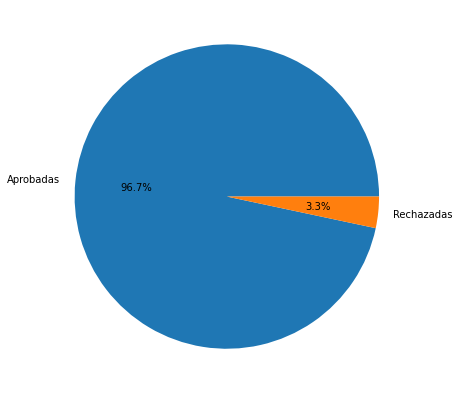

In [ ]:
Totales = [NumAprobadas, NumRechazadas]
tag = ["Aprobadas", "Rechazadas"]
plt.figure(figsize=(7,7))
plt.pie(Totales, labels = tag, autopct="%0.1f%%")

plt.show

# 6. Datos outliners en la metadata


In [ ]:
dfMeta = df.loc['metadata']
MetaTrans = dfMeta.transpose()
dfNum = pd.to_numeric(MetaTrans['SI'])
dfNum

0      15
1      37
2      27
3      39
4      35
       ..
420    33
421    35
422    25
423    33
424    24
Name: SI, Length: 424, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x28a7acb1580>,
 'caps': [<matplotlib.lines.Line2D at 0x28a7acb1be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a7acb1130>],
 'medians': [<matplotlib.lines.Line2D at 0x28a7acbd340>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a7acbd6d0>],
 'means': []}

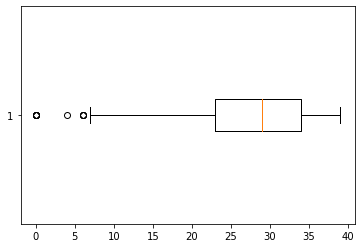

In [ ]:
plt.boxplot(dfNum,vert= False)

En el grafico anterior se pueden ver los outliers que se encuentra en la tabla de metadata basado en la cantidad de gente que voto por SI.
En el grafico se pueden ver que en tres fechas distintas se encuentras datos que no concuerdan, ya que en datos mas agrupados se pueden encontrar numeros entre 20 y 40, y en esos tres datos se ven numeros menores a 8.